In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.interpolate import make_interp_spline

# 1. Univariate Linear Regression  

### Generate the data

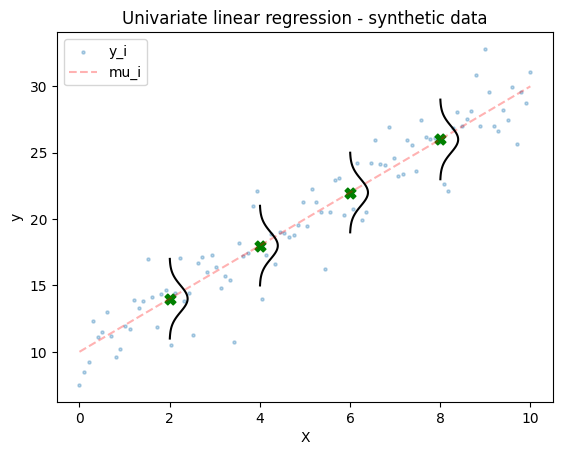

In [12]:
num_points = 100
b0 = 10
b1 = 2
sigma = 2 

X = np.linspace(0, 10, num_points)
y = b0 + X * b1  + np.random.normal(0, sigma, num_points) 
mu_i = b0 + X * b1

# Plot
plt.scatter(X, y, label="y_i", s=5,  alpha =  0.3)
plt.plot(X, mu_i,  "--", color = 'red', label = 'mu_i', alpha =  0.3)
# plot gaussian distribution 
for i in [2,4,6,8]:
    ygaus = np.linspace(- 3, + 3, 100)
    Xgaus = stats.norm.pdf(ygaus, scale = 1) 
    plt.scatter(i, b0+ i* b1, marker = 'X', color = 'green', s= 60 )
    plt.plot(Xgaus+i ,  ygaus+ i * b1 +b0   , color = 'black')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Univariate linear regression - synthetic data")
plt.legend()
plt.show()

### Fit a linear regression model

In [13]:
# Put the data in a dataframe
data = pd.DataFrame({'y':y, "X":X})

In [ ]:
# Define model formula
formula = "y ~ X"

# Define probability distribution for the response variable and the link function
family_LM = sm.families.Gaussian(link= sm.families.links.identity())

# Define and fit a linear regression model
Linear_regression_model = glm(formula = formula, data = data , family = family_LM).fit()

# Summary of the fitted model
print(Linear_regression_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          3.7305
Method:                          IRLS   Log-Likelihood:                -206.71
Date:                Wed, 12 Jun 2024   Deviance:                       365.59
Time:                        22:25:09   Pearson chi2:                     366.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8781      0.383     25.764      0.0

### Checking Assumption of linear regression 

**1st assumption: linear relationship between dependent and independent variable**

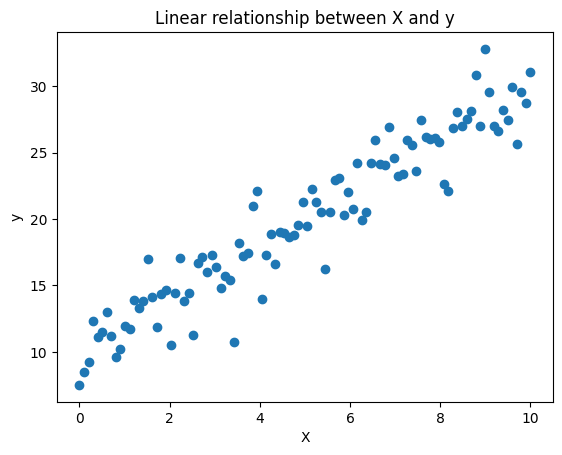

In [15]:
plt.title('Linear relationship between X and y')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**2nd Assumption: Homoscedasticity --> constant variance of residuals with respect to y**

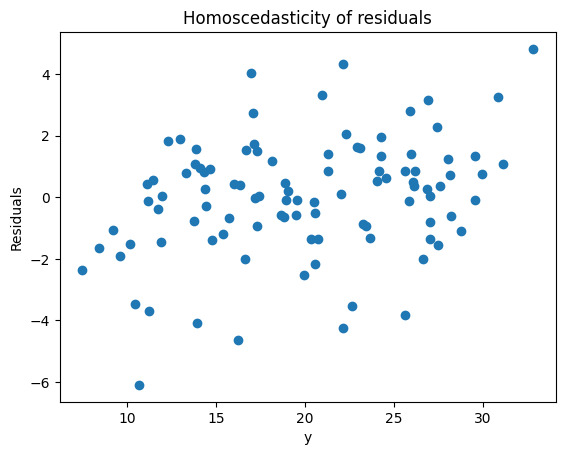

In [17]:
plt.title('Homoscedasticity of residuals')
plt.scatter(y, Linear_regression_model.resid_response)
plt.xlabel('y')
plt.ylabel('Residuals')
plt.show()

**3rd Assumption: no autocorrelation of residuals**

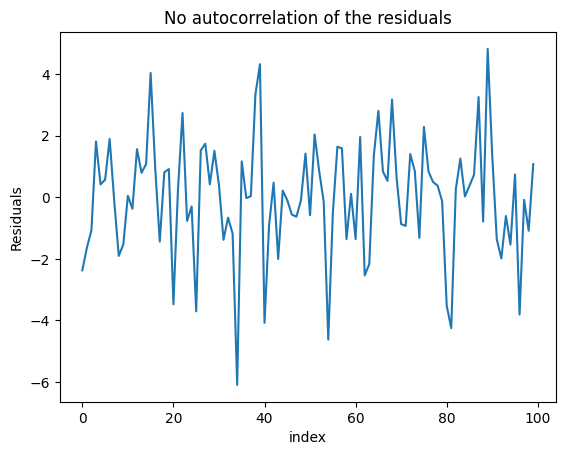

In [18]:
plt.title('No autocorrelation of the residuals')
plt.plot(range(len(Linear_regression_model.resid_response)), Linear_regression_model.resid_response)
plt.xlabel('index')
plt.ylabel('Residuals')
plt.show()

**4th Assumption: residuals normality**

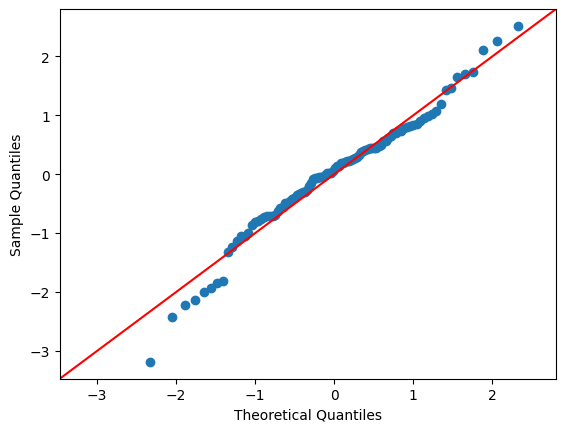

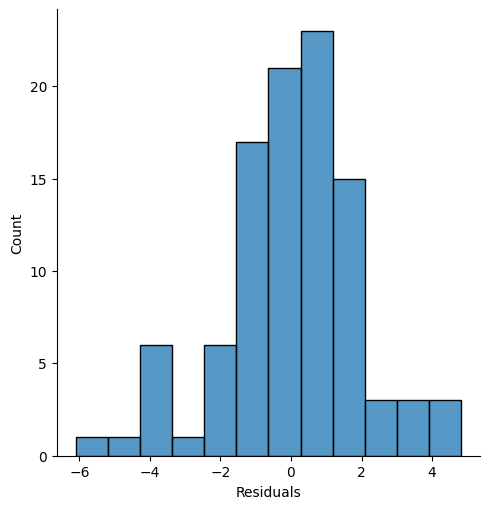

------------ Shapiro-Wilk Test ---------------
Shapiro-Wilk Test Statistic: 0.9780786325307739
P-value: 0.09406719788900951
The data is approximately normally distributed (fail to reject H0)


In [ ]:
# QQ plot
sm.qqplot(Linear_regression_model.resid_response , fit=True, line="45")
plt.show()

# Histogram
sns.displot(Linear_regression_model.resid_response)
plt.xlabel("Residuals")
plt.show()

## Perform Shapiro-Wilk test for normality 
statistic, p_value = shapiro(Linear_regression_model.resid_response)
print('------------ Shapiro-Wilk Test ---------------')
# Check the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data is approximately normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

**5th Assumption: residuals are independent from X**

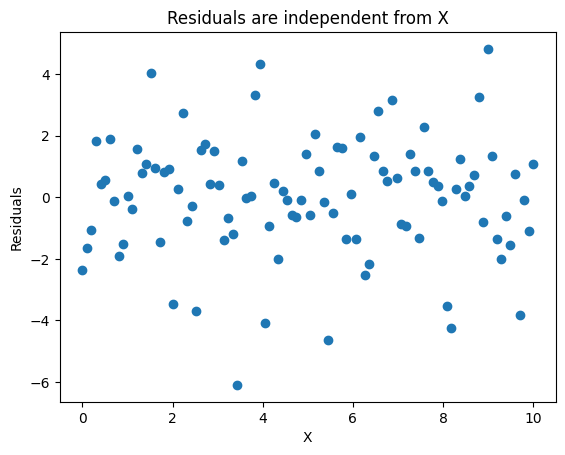

In [21]:
plt.title('Residuals are independent from X')
plt.scatter(X, Linear_regression_model.resid_response)
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

# 2. Binary Logistic Regression

### Generate the data

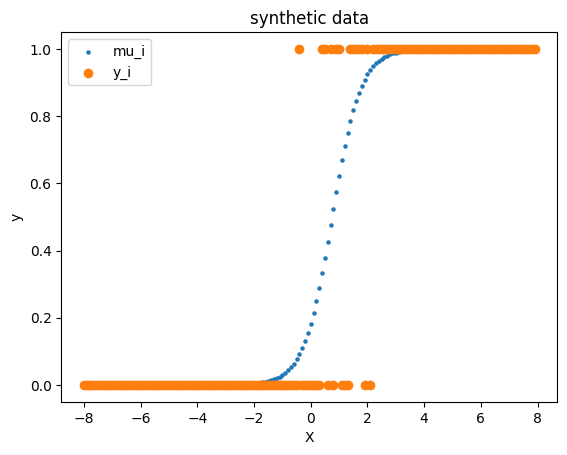

In [22]:
X = np.arange(-8,8,0.1)
b0 = -1.5
b1 = 2

mu_i = np.exp(X * b1 +b0)/(1 + np.exp(X * b1 +b0))
y = np.random.binomial(1, mu_i)
plt.title('synthetic data')
plt.scatter(X, mu_i, label = 'mu_i', s = 5)
plt.scatter(X, y, label = 'y_i')
plt.legend()
plt.ylabel('y')
plt.xlabel('X')
plt.show()

### Fit a logistic regression model

In [23]:
# Put the data in a dataframe
data = pd.DataFrame({'y':y, "X":X})

# Define model formula
formula = "y ~ X"

# Define probability distribution for the response variable and the link function
family_LG = sm.families.Binomial(link= sm.families.links.logit())

# Fit glm model with the above model matrix configuration
Logistic_regression_model = glm(formula, data = data, family = family_LG).fit()

# Print summary of the fitted model
print(Logistic_regression_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  160
Model:                            GLM   Df Residuals:                      158
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.016
Date:                Wed, 12 Jun 2024   Deviance:                       38.032
Time:                        22:26:18   Pearson chi2:                     41.6
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6779
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6435      0.561     -2.928      0.0

### A more complex example

In [24]:
data = {
    "Age": [35, 43, 28, 52, 46, 31, 39, 25, 56, 41, 48, 50, 55, 60, 58, 63, 30, 33, 37, 42],
    "Education_Level": ["High", "Medium", "Low", "High", "Medium", "Low", "High", "Medium", "Low", "High", "High", "Medium", "Low", "High", "Medium", "Low", "High", "Medium", "Low", "High"],
    "Bought_Insurance": ["Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "Yes"]
}
insurance_data = pd.DataFrame(data)
insurance_data['Bought_Insurance'] = insurance_data['Bought_Insurance'].replace({"Yes":1,"No":0})
insurance_data.head()

,Age,Education_Level,Bought_Insurance
0,35,High,1
1,43,Medium,0
2,28,Low,1
3,52,High,1
4,46,Medium,1


In [25]:
# Define probability distribution for the response variable for the logistic (GLM) model
family_GLM = sm.families.Binomial()

# Fit glm model with the above model matrix configuration
model = glm("Bought_Insurance ~ C(Education_Level) + Age", data = insurance_data, family = family_GLM).fit()

# Summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Bought_Insurance   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.7068
Date:                Wed, 12 Jun 2024   Deviance:                       11.414
Time:                        22:26:31   Pearson chi2:                     12.1
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# 3. Poisson Linear Regression

### Generate the data

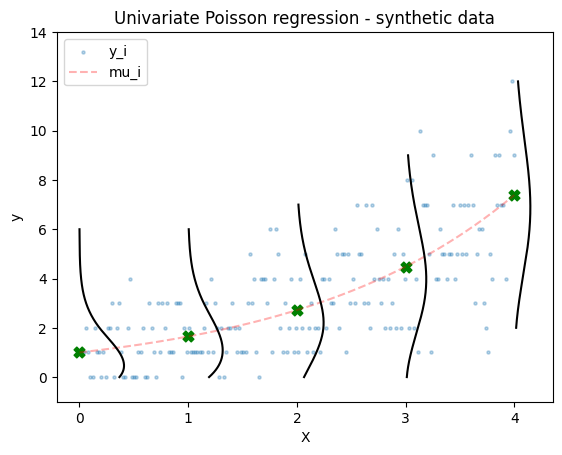

In [26]:
num_points = 200
b0 = 0
b1 = 0.5

X = np.linspace(0, 4, num_points)
mu_i = np.exp(b0 + b1* X)
y = np.random.poisson(mu_i)

# Plot
plt.scatter(X, y, label="y_i", s=5,  alpha =  0.3)
plt.plot(X, mu_i,  "--", color = 'red', label = 'mu_i', alpha =  0.3)
# plot poisson distributions
for i in [0,1,2,3,4]:
    mu = np.exp(b0 + b1* i)
    #print(mu)
    ypois = np.linspace(int(mu) -5,int(mu)+ 5, 11)
    ypois = ypois[ypois >=0]
    Xpois = stats.poisson.pmf(ypois, mu)
    spline = make_interp_spline(ypois, Xpois)
    x_smooth = np.linspace(ypois.min(), ypois.max(), 500)
    y_smooth = spline(x_smooth)

    plt.scatter(i, mu, marker = 'X', color = 'green', s= 60 )
    plt.plot(y_smooth + i,  x_smooth  , color = 'black')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Univariate Poisson regression - synthetic data")
plt.ylim([-1,14])
plt.legend()
plt.show()

### Fit a poisson linear regression model

In [27]:
# Put the data in a dataframe
data = pd.DataFrame({'y':y, "X":X})

# Define model formula
formula = "y ~ X"

# Define probability distribution for the response variable and the link function
family_Poisson = sm.families.Poisson(link= sm.families.links.log())

# Define and fit a linear regression model
Poisson_regression_model = glm(formula = formula, data = data , family = family_Poisson).fit()

# Print summary of the fitted model
print(Poisson_regression_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -370.14
Date:                Wed, 12 Jun 2024   Deviance:                       201.36
Time:                        22:26:35   Pearson chi2:                     182.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6296
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0219      0.105      0.208      0.8

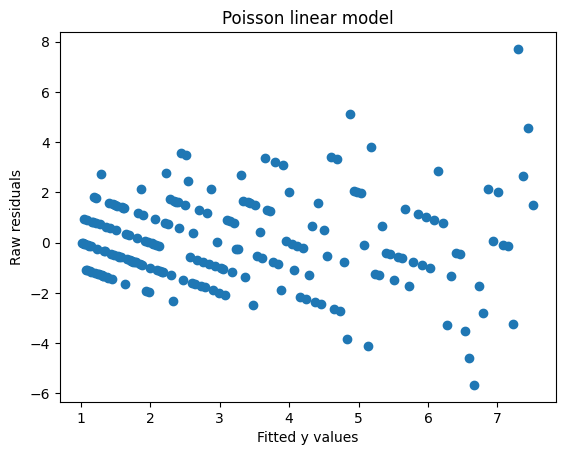

In [28]:
# Print distribution of the residuals
plt.title('Poisson linear model')
plt.scatter(Poisson_regression_model.fittedvalues, Poisson_regression_model.resid_response)
plt.ylabel('Raw residuals')
plt.xlabel("Fitted y values")
plt.show()

# 4. Gamma Linear Regression

### Generate the data

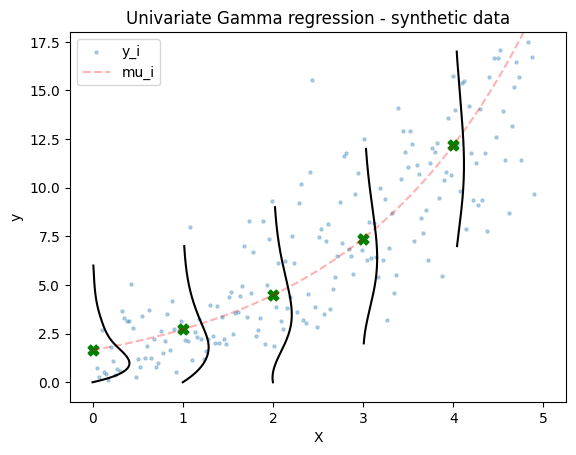

In [ ]:
num_points = 200
b0 = 0.5
b1 = 0.5

X = np.linspace(0, 5, num_points)
mu_i = np.exp(b0 + b1* X)
y = np.random.gamma(mu_i)

# Plot
plt.scatter(X, y, label="y_i", s=5,  alpha =  0.3)
plt.plot(X, mu_i,  "--", color = 'red', label = 'mu_i', alpha =  0.3)
# plot gamma distribution 
for i in [0,1,2,3,4]:
    mu = np.exp(b0 + b1* i)
    #print(mu)
    ygamm = np.linspace(int(mu) -5,int(mu)+ 5, 11)
    ygamm = ygamm[ygamm >=0]
    Xgamm = stats.gamma.pdf(ygamm, mu)
    spline = make_interp_spline(ygamm, Xgamm)
    x_smooth = np.linspace(ygamm.min(), ygamm.max(), 500)
    y_smooth = spline(x_smooth)

    plt.scatter(i, mu, marker = 'X', color = 'green', s= 60 )
    plt.plot(y_smooth + i,  x_smooth  , color = 'black')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Univariate Gamma regression - synthetic data")
plt.ylim([-1,18])
plt.legend()
plt.show()

### Fit a Gamma linear regression model

In [30]:
# Put the data in a dataframe
data = pd.DataFrame({'y':y, "X":X})

# Define model formula
formula = "y ~ X"

# Define probability distribution for the response variable and the link function
family_Gamma = sm.families.Gamma(link= sm.families.links.log())

# Define and fit a linear regression model
Gamma_regression_model = glm(formula = formula, data = data , family = family_Gamma).fit()

# Print summary of the fitted model
print(Gamma_regression_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.21384
Method:                          IRLS   Log-Likelihood:                -466.75
Date:                Wed, 12 Jun 2024   Deviance:                       46.275
Time:                        22:26:41   Pearson chi2:                     42.3
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9001
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4608      0.065      7.073      0.0

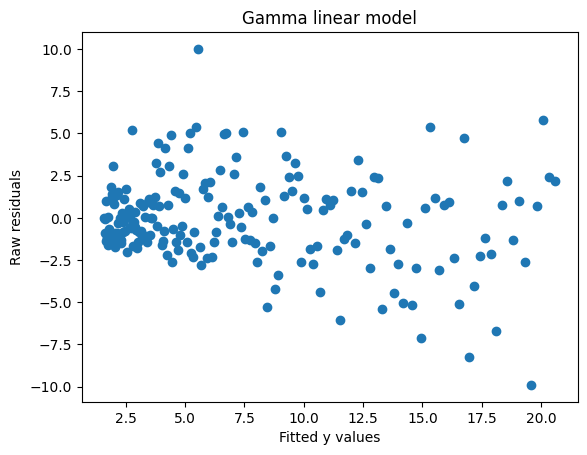

In [31]:
# Print distribution of the residuals
plt.title('Gamma linear model')
plt.scatter(Gamma_regression_model.fittedvalues, Gamma_regression_model.resid_response)
plt.ylabel('Raw residuals')
plt.xlabel("Fitted y values")
plt.show()